In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [3]:
df_ROS_Q= pd.read_csv('../datasets/RecurrenceOfSurgery_exdata.csv')
df_ROS_Q.head()

,Unnamed: 0,환자ID,체중,신장,신부전여부,헤모글로빈수치,혈액형,과거수술횟수,연령,환자통증정도,통증기간(월),수술시간,디스크단면적,척추이동척도,척추전방위증,입원기간,BMI,BMI_categori
0,0,1PT,60.3,163,0,13.66,RH+A,0,66,10,1.0,68.0,2048.5,Down,0,2,22.695623,정상 체중
1,1,2PT,71.7,171,0,13.73,RH+A,0,47,10,1.0,31.0,1753.1,Up,0,1,24.520365,정상 체중
2,3,4PT,74.2,174,0,15.38,RH+O,0,40,7,2.0,73.0,1796.2,Down,0,1,24.507861,정상 체중
3,11,12PT,64.9,162,0,17.28,RH+O,0,65,10,1.0,49.0,2119.3,Middle,0,1,24.729462,정상 체중
4,15,16PT,75.6,176,0,15.05,RH+B,0,84,7,1.0,42.0,2155.3,Down,0,1,24.405992,정상 체중


### 상관관계 확인
- 목표변수 : '입원기간' - 분포 언발런스 (연속형 : 정규화 확인, 범주형 : 밸런스 확인)
- 설명변수 : 
    - '신장' : 목표변수 대변 분포 변화 적음
    - '체중' : 몸무게 차이 따라 분포 변화 영향 있음 
    - '연령' : 상대적으로 나이 많으면 발생율이 높은 것으로 보임.
    - '혈액형' : 차이에 여부 확인 필요(확증 데이터 분석)
    - '신부전여부' : 관계없어 보임
    - '헤모글로빈수치' :
    - 'BMI':

In [4]:
df_ROS_h = df_ROS_Q[['입원기간','신장','체중' ,'신부전여부','연령', '헤모글로빈수치', '혈액형','BMI','BMI_categori']]
df_ROS_h.sort_values(by=['입원기간'])

,입원기간,신장,체중,신부전여부,연령,헤모글로빈수치,혈액형,BMI,BMI_categori
80,1,168,69.5,0,42,14.87,RH+A,24.624433,정상 체중
127,1,174,74.0,0,47,15.95,RH+A,24.441802,정상 체중
73,1,167,69.0,0,37,14.42,RH+O,24.740937,정상 체중
72,1,164,60.6,0,33,14.49,RH+B,22.531231,정상 체중
71,1,152,56.5,0,31,14.16,RH+O,24.454640,정상 체중
...,...,...,...,...,...,...,...,...,...
78,3,171,71.9,0,60,16.91,RH+O,24.588762,정상 체중
26,3,179,77.9,0,64,13.97,RH+O,24.312599,정상 체중
154,4,143,56.0,0,56,13.10,RH+O,27.385202,과체중
157,4,171,68.0,0,37,15.10,RH+AB,23.255019,정상 체중


<Axes: xlabel='입원기간', ylabel='count'>

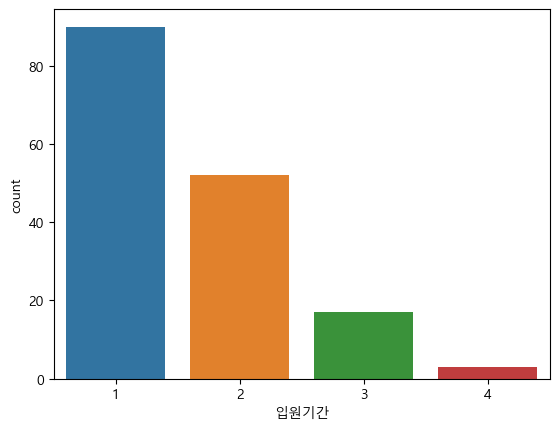

In [5]:
### 데이터 타입과 분포
## 목표변수 
sns.countplot(data=df_ROS_h,x='입원기간')

In [15]:
df_ROS_lsit = df_ROS_h.describe(include=object).columns.to_list() 

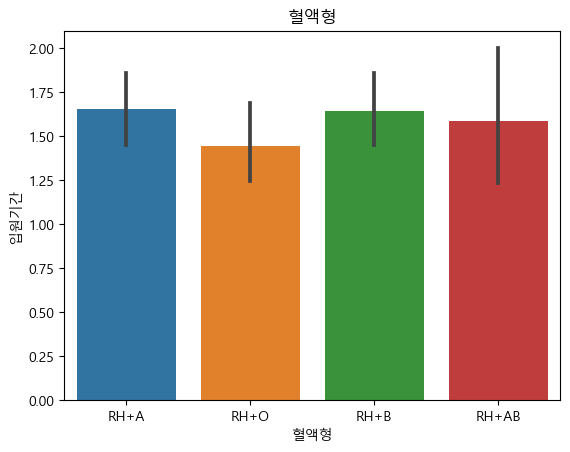

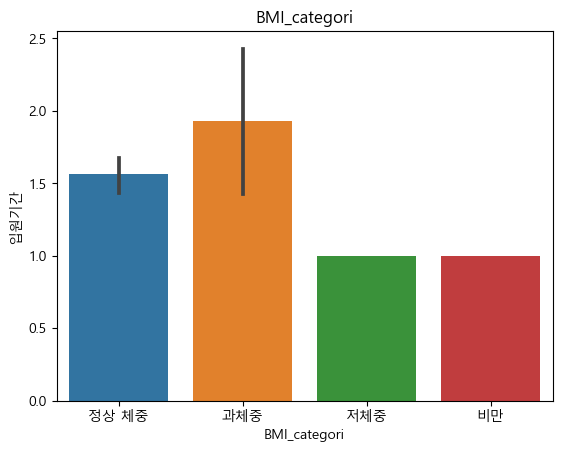

In [16]:
for continuous in df_ROS_lsit:
    sns.barplot(data=df_ROS_h, x=continuous, y='입원기간')  
    plt.title(f'{continuous}')
    plt.xlabel(continuous)
    plt.show()

### EDA
- 단일변수
    - 1. 연속형 : 데이터 분포의 확인(Histogram , KDE 확률밀도함수 , Box plot)
    - 2. 범주형 : 각 항목의 빈도수 확인(Bar Chart, Pie Chart)
- 다 변수 
    - 1. X : 범주형 / Y : 연속형 => 집단 간(항목 간) 통계량 비교 (Bat Chart , Box Plot)
    - 2. X : 연속형 / Y : 연속형 => 두 데이터간 상관성(Scatter Plot 산점도)
    - 3. X : 연속형 / Y: 연속형  => 시간(순서)에 따른 경향성 확인 (Line Chart)
    - 4. 기타
    
- 데이터 유형
    - 연속형 : 입원기간, 신장, 체중, 연령, 헤모글로빈수치 
    - 범주형 : 신부전여부, 혈액형

###  X : 범주형 / Y : 연속형

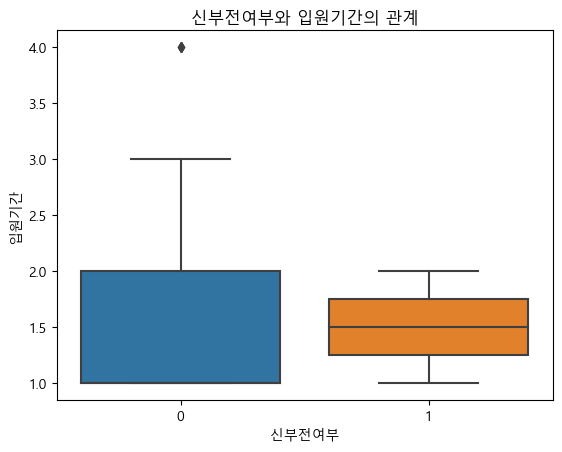

In [8]:
sns.boxplot(data=df_ROS_h, x='신부전여부', y='입원기간')
plt.xlabel('신부전여부')
plt.ylabel('입원기간')
plt.title('신부전여부와 입원기간의 관계')
plt.show()

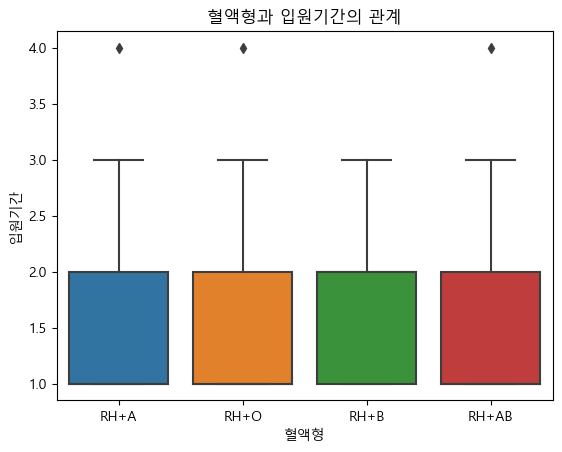

In [9]:
sns.boxplot(data=df_ROS_h, x='혈액형', y='입원기간')
plt.xlabel('혈액형')
plt.ylabel('입원기간')
plt.title('혈액형과 입원기간의 관계')
plt.show()

### X : 연속형 / Y : 연속형

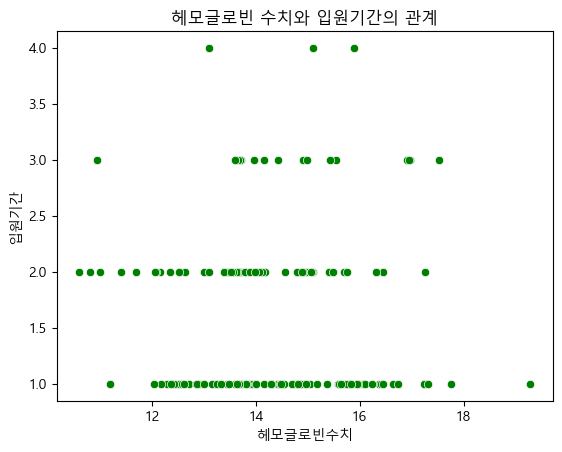

In [10]:
sns.scatterplot(data=df_ROS_h, x='헤모글로빈수치', y='입원기간',  color='green')
plt.xlabel('헤모글로빈수치')
plt.ylabel('입원기간')
plt.title('헤모글로빈 수치와 입원기간의 관계')
plt.show()

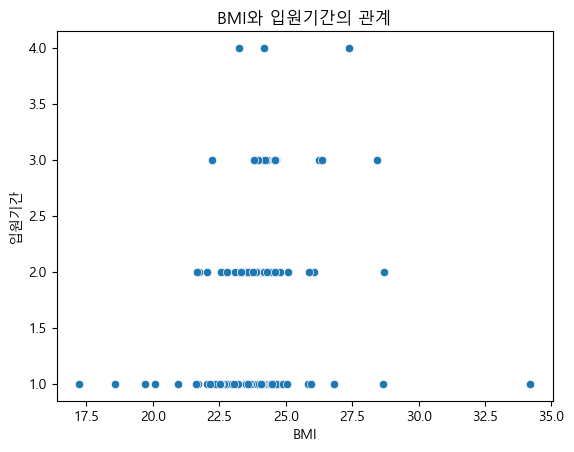

In [11]:
sns.scatterplot(data=df_ROS_h, x='BMI', y='입원기간')
plt.xlabel('BMI')
plt.ylabel('입원기간')
plt.title('BMI와 입원기간의 관계')
plt.show()

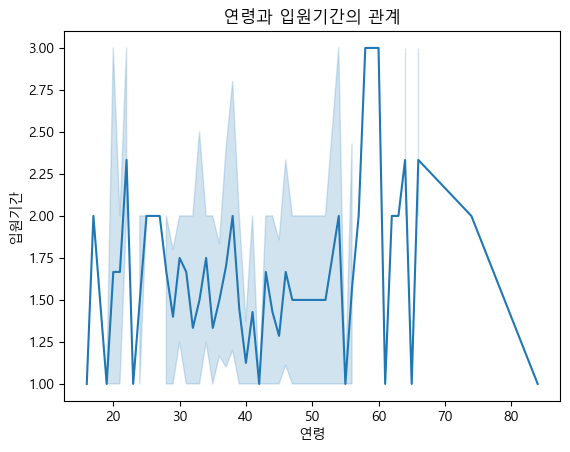

In [12]:
sns.lineplot(data=df_ROS_h, x='연령', y='입원기간')
plt.xlabel('연령')
plt.ylabel('입원기간')
plt.title('연령과 입원기간의 관계')
plt.show()

### 근거를 가지고 오지 못해 못쓰는 분석
    - BMI는 근거가 정확하고 식으로 된 형태라서 신장과 체중을 합쳐 BMI 라는 새로운 컬럼을 만들어서 사용가능하지만 , 내가 선택한 신부전여부와 연령은 나이가 많을수록 신부전이 더 걸린다라는게 검증되지 않았기 때문에 쓰지 못한다

#### 헤모글로빈수치 & 혈액형 

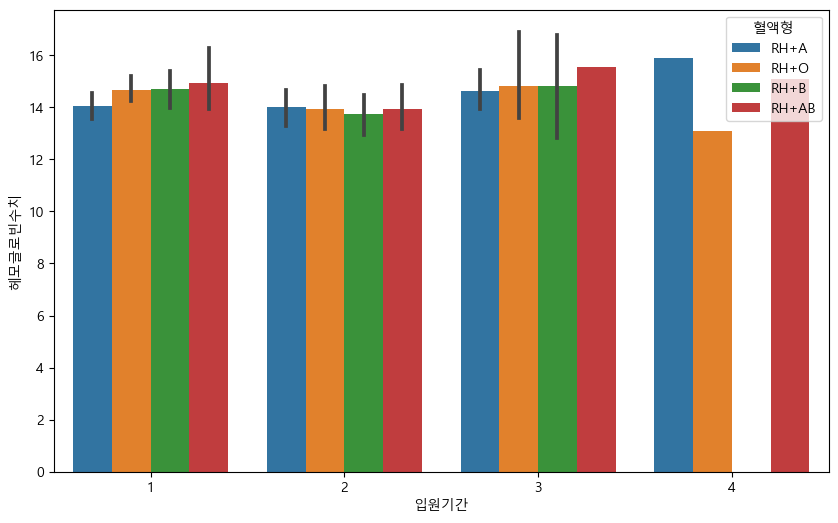

In [13]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=df_ROS_h, x='입원기간', y='헤모글로빈수치', hue='혈액형')
plt.xlabel('입원기간')
plt.ylabel('헤모글로빈수치')
plt.show()


#### 신부전여부와 연령에 따른 입원기간

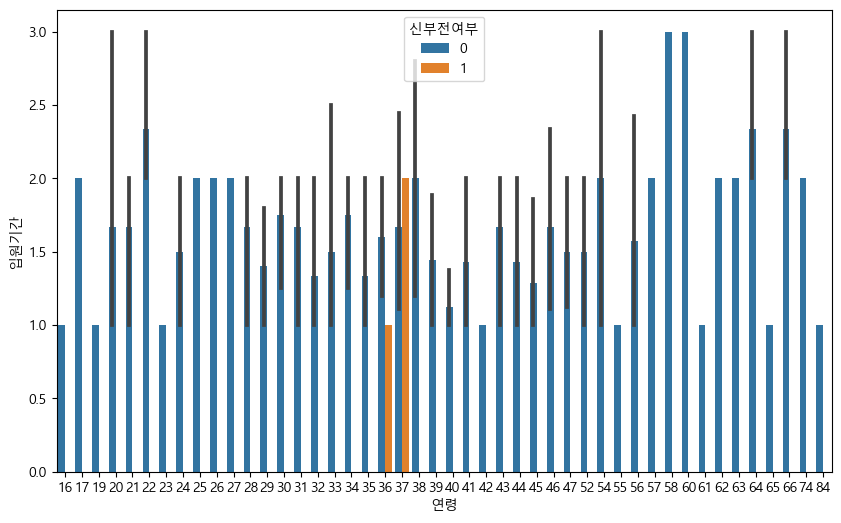

In [14]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=df_ROS_h, x='연령', y='입원기간', hue='신부전여부')
plt.xlabel('연령')
plt.ylabel('입원기간')
plt.show()